## Install Dependencies

In [ ]:
#https://pypi.org/project/tf-semantic-segmentation/

In [ ]:
!pip uninstall -y grpcio
!pip install tensorflow==2.4.0
!pip install tensorflow-addons==0.12.0
!pip install tf-semantic-segmentation --upgrade
# !pip install git+https://github.com/baudcode/tf-semantic-segmentation.git

Found existing installation: grpcio 1.48.1
Uninstalling grpcio-1.48.1:
  Successfully uninstalled grpcio-1.48.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.7 MB 15 kB/s 
     |████████████████████████████████| 132 kB 58.3 MB/s 
     |████████████████████████████████| 14.8 MB 35.0 MB/s 
     |████████████████████████████████| 462 kB 45.0 MB/s 
     |████████████████████████████████| 2.9 MB 40.5 MB/s 
     |████████████████████████████████| 3.8 MB 39.2 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68723 sha256=94333e4a994e183d5f4325390e6a739baed7eff1a87909bfab9c33ba3c8234c8
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      S

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 703 kB 7.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 172 kB 7.8 MB/s 
     |████████████████████████████████| 1.8 MB 50.4 MB/s 
     |████████████████████████████████| 162 kB 56.6 MB/s 
     |████████████████████████████████| 181 kB 51.0 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 158 kB 51.0 MB/s 
     |████████████████████████████████| 157 kB 55.9 MB/s 
     |████████████████████████████████| 157 kB 53.3 MB/s 
     |████████████████████████████████| 157 kB 42.0 MB/s 
     |████████████████████████████████| 157 kB 46.7 MB/s 
     |████████████████████████████████| 157 kB 59.3 MB/s 
     |████████████████████████████████| 157 kB 62.9 MB/s 
     |████████████████████████████████| 157 kB 57.6 

In [ ]:
!pip install pixellib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 430 kB 8.3 MB/s 
     |████████████████████████████████| 8.4 MB 42.4 MB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 42 kB 818 kB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 
     |████████████████████████████████| 151 kB 47.3 MB/s 
     |████████████████████████████████| 1.5 MB 45.9 MB/s 
     |████████████████████████████████| 843 kB 40.5 MB/s 
     |████████████████████████████████| 96 kB 5.3 MB/s 
     |████████████████████████████████| 117 kB 41.5 MB/s 
     |████████████████████████████████| 97 kB 5.7 MB/s 
     |████████████████████████████████| 97 kB 5.2 MB/s 
     |████████████████████████████████| 3.1 MB 43.9 MB/s 
     |████████████████████████████████| 87 kB 4.6 MB/s 
     |████████████████████████████████| 59.9 MB 105 kB/s 
     |████████████████████████████████| 344 kB

Restart the **runtime**

## Semantic Segmenatation

In [2]:
import os

src_path = os.path.join(os.getcwd(), 'Collected imgs')
dest_path = os.path.join(os.getcwd(), 'Collected imgs seg full')
src_path

'D:\\z_DL\\Huggineface_demo\\huggingface_image_segmentation\\Collected imgs'

In [ ]:
import pixellib
from pixellib.semantic import semantic_segmentation
import cv2

segment_image = semantic_segmentation()
segment_image.load_ade20k_model("deeplabv3_xception65_ade20k.h5")
file_name_list=[]
class_ids_list=[]
class_names_list=[]
class_colors_list=[]
ratios_list=[]
def seg_image(img_name):
  segvalues, segoverlay = segment_image.segmentAsAde20k(img_name, overlay= True)
  head, tail = os.path.split(img_name)
  file_name = os.path.join(dest_path,tail)
  cv2.imwrite(file_name, segoverlay)
  #print(segoverlay)
  #print(segvalues['class_ids'])

  file_name_list.append(tail)
  class_ids_list.append(segvalues['class_ids'])
  class_names_list.append(segvalues['class_names'])
  class_colors_list.append(segvalues['class_colors'])
  ratios_list.append(segvalues['ratios'])

In [4]:
from IPython.display import Image
for images in os.listdir(src_path):
    seg_image(os.path.join(src_path,images))


In [4]:
#https://stackoverflow.com/questions/53898836/export-dataframe-as-csv-file-from-google-colab-to-google-drive
#https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file
import pandas as pd
segment_df= pd.DataFrame(list(zip(file_name_list, class_ids_list, class_names_list, class_colors_list, ratios_list)),
              columns=['file_name','class_ids', 'class_names','class_colors', 'ratios'])

segment_df.to_csv('segmentation_summary.csv', encoding='utf-8', index=False)

## Instance Segmenatation

In [ ]:
from pixellib.instance import instance_segmentation

#https://github.com/ayoolaolafenwa/PixelLib/blob/master/pixellib/instance/__init__.py
seg = instance_segmentation(infer_speed = "average")
seg.load_model("mask_rcnn_coco.h5",  confidence= 0.10)
target_classes = seg.select_target_classes(car=True,bus=True, truck=True )
seg.segmentImage("temp.jpg",  show_bboxes=True,  output_image_name="a.jpg") 

Processed image saved successfully in your current working directory.


({'rois': array([[ 774, 1213,  990, 1450],
         [ 669,  645,  802,  788],
         [ 523, 1178,  586, 1281],
         [ 484, 1035,  540, 1102],
         [ 514, 1731,  579, 1836],
         [ 509, 1560,  576, 1649],
         [ 513,  754,  602,  836],
         [ 467,  899,  537,  967],
         [ 481, 1090,  543, 1183],
         [ 450, 1086,  489, 1146],
         [ 408,  979,  450, 1031],
         [ 464,  772,  518,  837],
         [ 410,  841,  452,  904],
         [ 507, 1860,  575, 1919],
         [ 447, 1408,  504, 1466],
         [ 403, 1022,  438, 1075],
         [ 435, 1029,  480, 1095],
         [ 365,  826,  443,  906],
         [ 661,  330,  722,  422],
         [ 665,  330,  720,  416]], dtype=int32),
  'class_ids': array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 3],
        dtype=int32),
  'scores': array([0.9947471 , 0.9872972 , 0.98305476, 0.9702491 , 0.95326877,
         0.93008274, 0.88389283, 0.8824642 , 0.8613477 , 0.8435555 ,
         0.78661096, 0.7

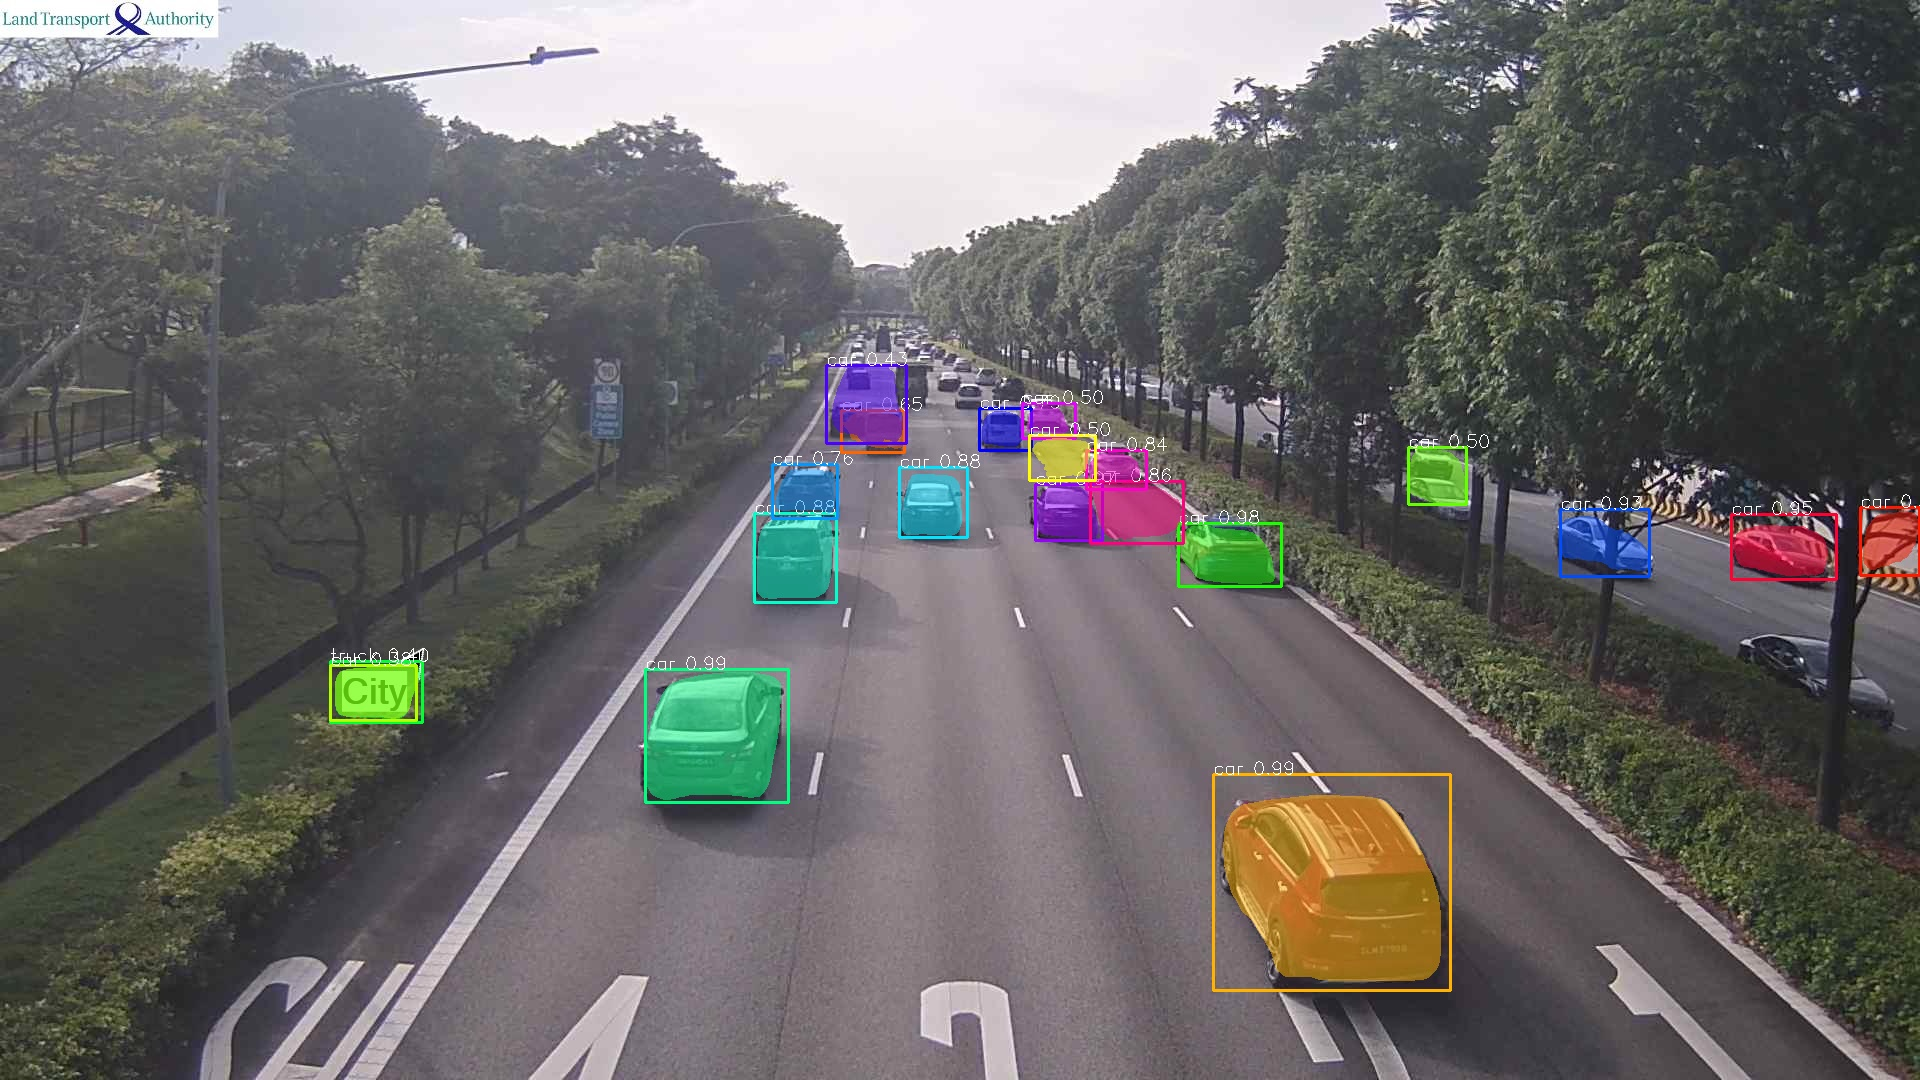

In [ ]:
from IPython.display import Image
Image('a.jpg')

Processed image saved successfully in your current working directory.


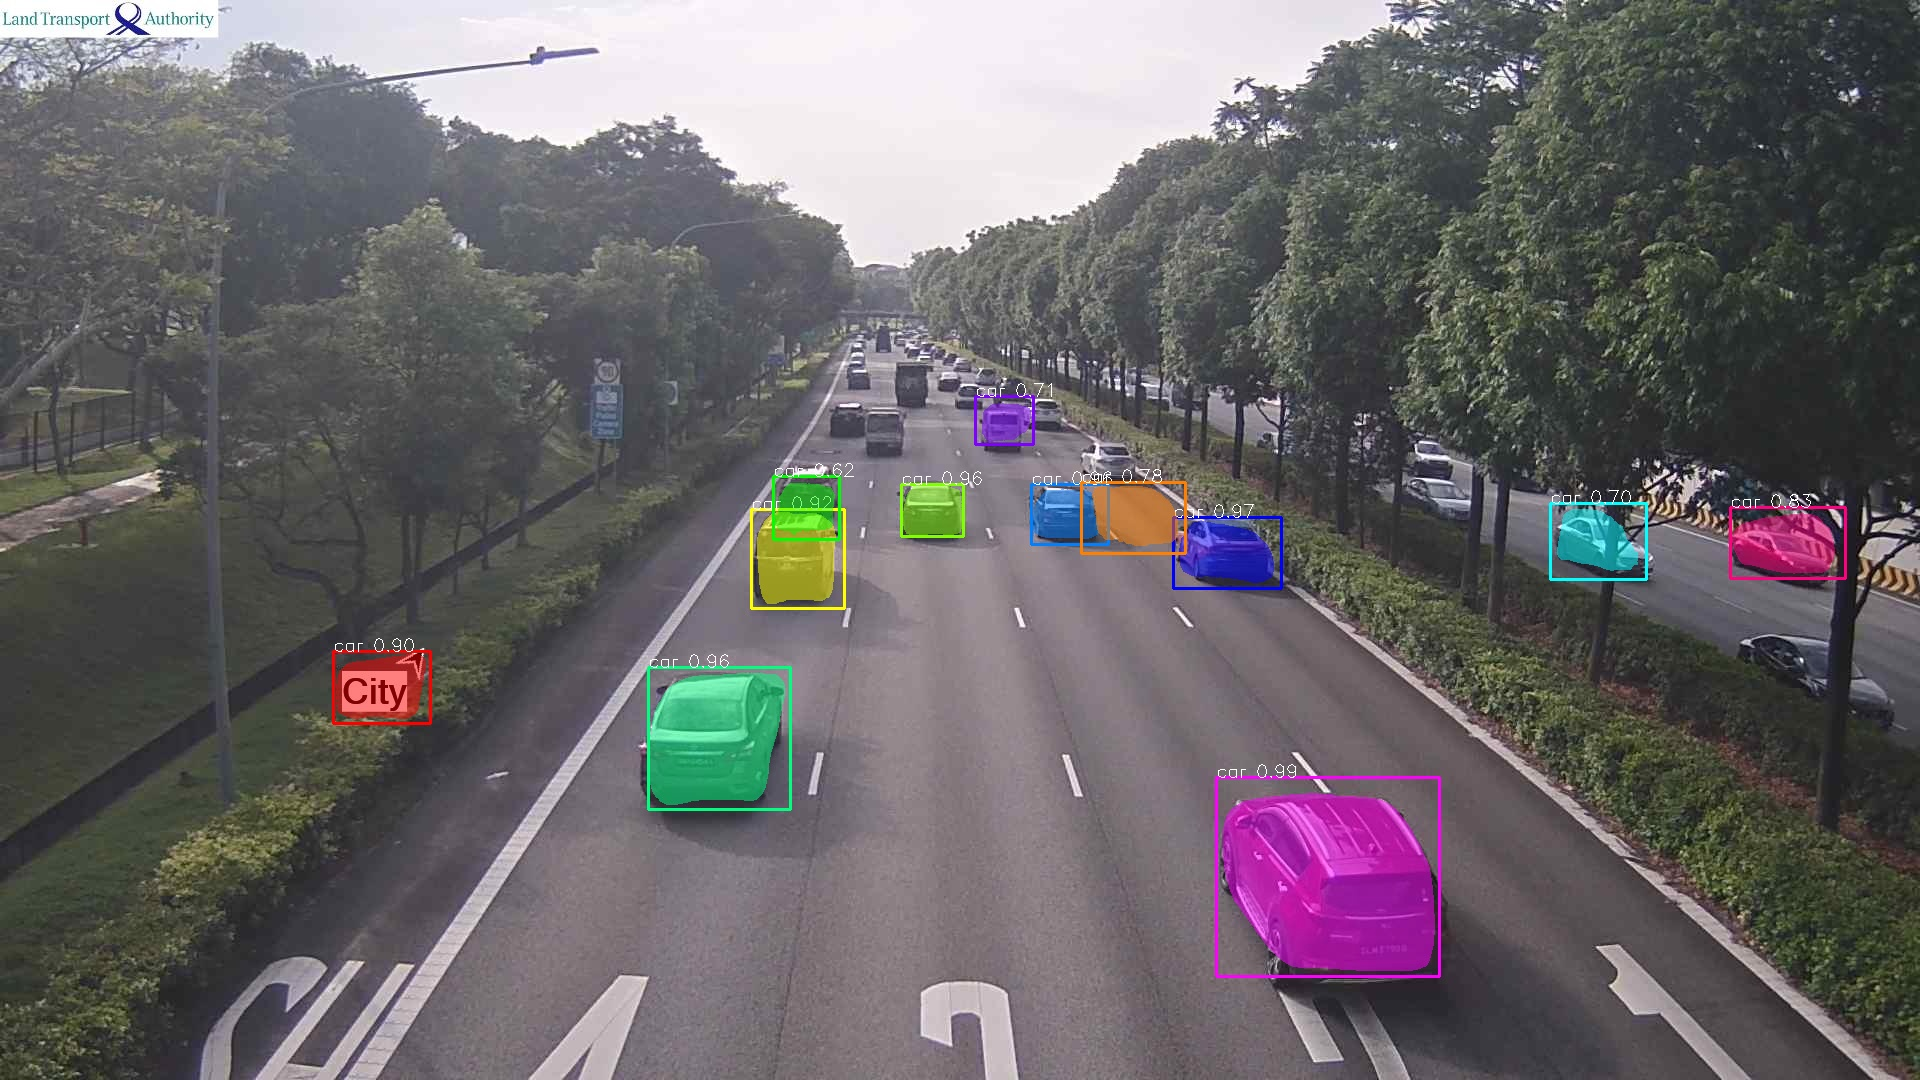

In [ ]:
seg = instance_segmentation(infer_speed = "fast")
seg.load_model("mask_rcnn_coco.h5")
#target_classes = seg.select_target_classes(car=True,bus=True, truck=True )
seg.segmentImage("temp.jpg",  show_bboxes=True,  output_image_name="b.jpg") 
Image('b.jpg')